<a href="https://colab.research.google.com/github/imanf18/UTS3-Greedy-ImanFushshilat-201012320033/blob/main/UTS3_Greedy_ImanFushshilat_201012320033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jarak antara #2 dan #5 adalah: 36.25 satuan
Jarak antara #2 dan #3 adalah: 68.07 satuan
Jarak antara #2 dan #4 adalah: 100.96 satuan
Jarak antara #2 dan #1 adalah: 73.79 satuan
Jarak antara #2 dan #6 adalah: 112.61 satuan
Jarak antara #2 dan #13 adalah: 182.39 satuan
Jarak antara #2 dan #9 adalah: 136.19 satuan
Jarak antara #2 dan #7 adalah: 142.21 satuan
Jarak antara #2 dan #8 adalah: 171.59 satuan
Jarak antara #2 dan #12 adalah: 217.48 satuan
Jarak antara #2 dan #11 adalah: 216.46 satuan
Jarak antara #2 dan #ABC adalah: 275.48 satuan
Jarak antara #2 dan #I adalah: 298.46 satuan
Jarak antara #2 dan #J adalah: 326.10 satuan
Jarak antara #2 dan #H adalah: 349.18 satuan
Jarak antara #2 dan #F adalah: 385.50 satuan
Jarak antara #2 dan #C adalah: 318.23 satuan
Jarak antara #2 dan #B adalah: 263.61 satuan
Jarak antara #2 dan #E adalah: 424.00 satuan
Jarak antara #2 dan #0 adalah: 120.83 satuan
Jarak antara #2 dan #A adalah: 372.84 satuan
Jarak antara #2 dan #D adalah: 249.07 satuan
Jarak an

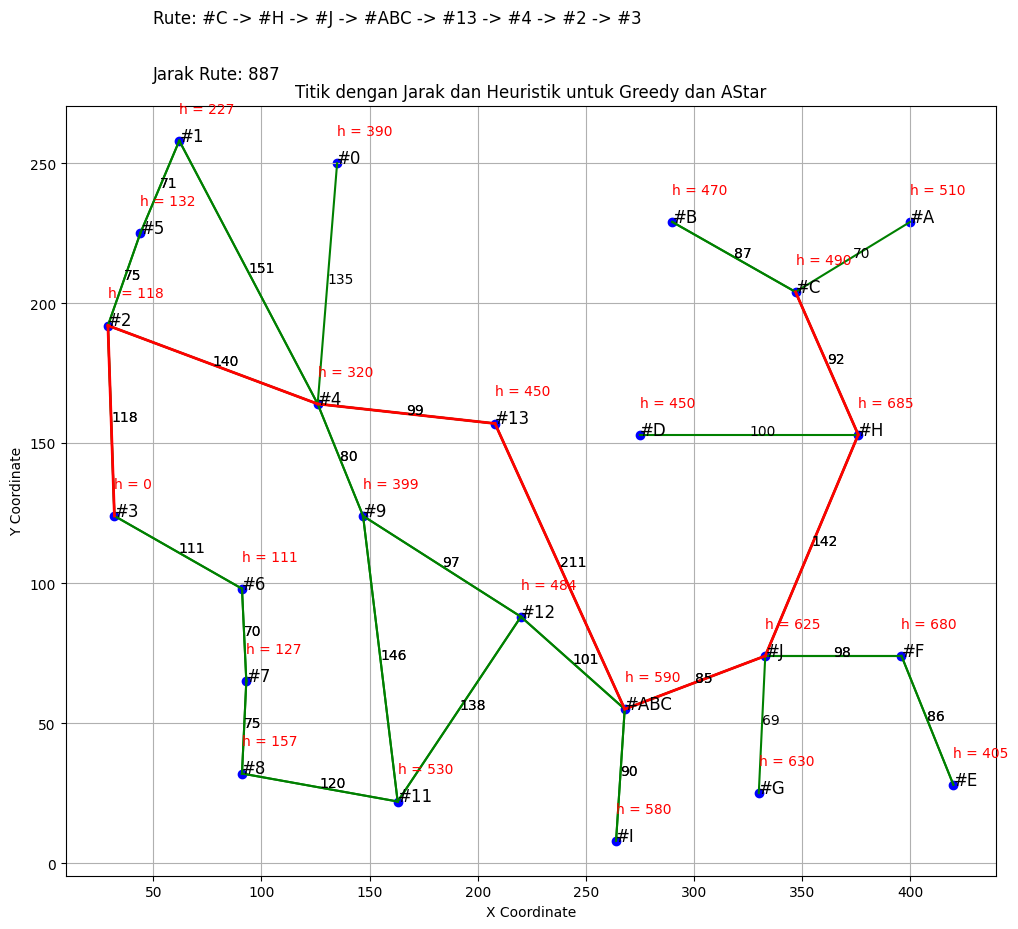

In [5]:
import math
import matplotlib.pyplot as plt

def euclidean_distance(city1, city2, city_coordinates):
    x1, y1 = city_coordinates[city1]
    x2, y2 = city_coordinates[city2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def plot_cities(city_coordinates, graph, heuristic, optimal_route):
    plt.figure(figsize=(12, 10))

    # Gambar garis-garis koneksi antar kota
    for city, connections in graph.items():
        x1, y1 = city_coordinates[city]
        for connected_city, distance in connections.items():
            x2, y2 = city_coordinates[connected_city]
            plt.plot([x1, x2], [y1, y2], color='green')  # Garis tegas berwarna hijau
            plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{distance}', color='black')

    # Gambar titik-titik kota
    for city, (x_coord, y_coord) in city_coordinates.items():
        plt.scatter(x_coord, y_coord, color='blue')
        plt.text(x_coord, y_coord, city, fontsize=12)

    # Tambahkan nilai heuristik
    for city, (x_coord, y_coord) in city_coordinates.items():
        heuristic_value = heuristic[city]
        plt.text(x_coord, y_coord + 10, f'h = {heuristic_value}', fontsize=10, color='red')

    # Gambar rute optimal dengan garis tebal berwarna merah
    for i in range(len(optimal_route) - 1):
        city1 = optimal_route[i]
        city2 = optimal_route[i + 1]
        x1, y1 = city_coordinates[city1]
        x2, y2 = city_coordinates[city2]
        plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Titik dengan Jarak dan Heuristik untuk Greedy dan AStar')

    # Tampilkan nilai rute dan heuristic
    route_distance = sum(graph[optimal_route[i]][optimal_route[i+1]] for i in range(len(optimal_route) - 1))
    plt.text(50, 300, f'Rute: {" -> ".join(optimal_route)}', fontsize=12)
    plt.text(50, 280, f'Jarak Rute: {route_distance}', fontsize=12)
    plt.grid(True)

    plt.show()

def greedy_search(graph, start, goal, heuristic):
    visited = set()  # set of visited nodes
    frontier = []  # priority queue for nodes to explore
    frontier.append((heuristic[start], start))  # (heuristic, node) tuple
    came_from = {}  # dictionary to store the path

    while frontier:
        _, current_node = frontier.pop(0)  # pop the node with the lowest heuristic value

        if current_node == goal:
            # Reached the goal node
            break

        visited.add(current_node)

        for next_node in graph[current_node]:
            if next_node not in visited:
                frontier.append((heuristic[next_node], next_node))
                came_from[next_node] = current_node
                frontier.sort(key=lambda x: x[0])  # sort the frontier based on heuristic value

    # Reconstruct the path from start to goal
    path = []
    if goal in came_from:
        current = goal
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()

    return path

# Graf koneksi antar kota
graph = {
    '#2': {'#5': 75, '#3': 118, '#4': 140}, #Arad
    '#5': {'#2': 75, '#1': 71}, #Zerind
    '#3': {'#2': 118, '#6': 111}, #Timisoara
    '#4': {'#2': 140, '#1': 151, '#13': 99, '#9': 80}, #Sibiu
    '#1': {'#5': 71, '#4': 151}, #Oradea
    '#6': {'#3': 111, '#7': 70}, #Lugoj
    '#13': {'#4': 99, '#ABC': 211}, #Fagaras
    '#9': {'#4': 80, '#12': 97, '#11': 146}, #Rimnicu Vilcea
    '#7': {'#6': 70, '#8': 75}, #Mehadia
    '#8': {'#7': 75, '#11': 120},#Drobeta
    '#12': {'#9': 97, '#11': 138, '#ABC': 101}, #Pitesti
    '#11': {'#9': 146, '#12': 138, '#8': 120}, #Craiova
    '#ABC': {'#13': 211, '#12': 101, '#I': 90, '#J': 85}, #Bucharest
    '#I': {'#ABC': 90}, #Giurgiu
    '#J': {'#ABC': 85, '#H': 142, '#F': 98}, #Urziceni
    '#H': {'#J': 142, '#C': 92}, #Vaslui
    '#F': {'#J': 98, '#E': 86}, #Hirsova
    '#C': {'#H': 92, '#B': 87}, #Iasi
    '#B': {'#C': 87}, #Neamt
    '#E': {'#F': 86}, #Eforie,
    '#0': {'#4': 135},
    '#A': {'#C': 70},
    '#D': {'#H': 100},
    '#G': {'#J': 69}
}

# Nilai heuristik dari Timisoara ke kota lainnya
heuristic_timisoara = {
    '#2': 118,
    '#5': 132,
    '#3': 0,
    '#4': 320,
    '#1': 227,
    '#6': 111,
    '#13': 450,
    '#9': 399,
    '#7': 127,
    '#8': 157,
    '#12': 484,
    '#11': 530,
    '#ABC': 590,
    '#I': 580,
    '#J': 625,
    '#H': 685,
    '#F': 680,
    '#C': 490,
    '#B': 470,
    '#E': 405,
    '#0': 390,
    '#A': 510,
    '#D': 450,
    '#G': 630
}

# Koordinat kota berdasarkan nilai heuristik
city_coordinates = {
    '#2': (29, 192),
    '#5': (44, 225),
    '#3': (32, 124),
    '#4': (126, 164),
    '#1': (62, 258),
    '#6': (91, 98),
    '#13': (208, 157),
    '#9': (147, 124),
    '#7': (93, 65),
    '#8': (91, 32),
    '#12': (220, 88),
    '#11': (163, 22),
    '#ABC': (268, 55),
    '#I': (264, 8),
    '#J': (333, 74),
    '#H': (376, 153),
    '#F': (396, 74),
    '#C': (347, 204),
    '#B': (290, 229),
    '#E': (420, 28),
    '#0': (135, 250),
    '#A': (400, 229),
    '#D': (275, 153),
    '#G': (330, 25)

}

def print_distances(city_coordinates):
    cities = list(city_coordinates.keys())
    for i in range(len(cities)):
        for j in range(i+1, len(cities)):
            distance = euclidean_distance(cities[i], cities[j], city_coordinates)
            print(f"Jarak antara {cities[i]} dan {cities[j]} adalah: {distance:.2f} satuan")

# Cetak jarak antar kota
print_distances(city_coordinates)

def plot_cities(city_coordinates, graph, heuristic, optimal_route):
    plt.figure(figsize=(12, 10))

    # Gambar garis-garis koneksi antar kota
    for city, connections in graph.items():
        x1, y1 = city_coordinates[city]
        for connected_city, distance in connections.items():
            x2, y2 = city_coordinates[connected_city]
            plt.plot([x1, x2], [y1, y2], color='green')  # Garis tegas berwarna hijau
            plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{distance}', color='black')

    # Gambar titik-titik kota
    for city, (x_coord, y_coord) in city_coordinates.items():
        plt.scatter(x_coord, y_coord, color='blue')
        plt.text(x_coord, y_coord, city, fontsize=12)

    # Tambahkan nilai heuristik
    for city, (x_coord, y_coord) in city_coordinates.items():
        heuristic_value = heuristic[city]
        plt.text(x_coord, y_coord + 10, f'h = {heuristic_value}', fontsize=10, color='red')

    # Gambar rute optimal dengan garis tebal berwarna merah
    for i in range(len(optimal_route) - 1):
        city1 = optimal_route[i]
        city2 = optimal_route[i + 1]
        x1, y1 = city_coordinates[city1]
        x2, y2 = city_coordinates[city2]
        plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Titik dengan Jarak dan Heuristik untuk Greedy dan AStar')

    # Tampilkan nilai rute dan heuristic
    route_distance = sum(graph[optimal_route[i]][optimal_route[i+1]] for i in range(len(optimal_route) - 1))
    plt.text(50, 300, f'Rute: {" -> ".join(optimal_route)}', fontsize=12)
    plt.text(50, 280, f'Jarak Rute: {route_distance}', fontsize=12)
    plt.grid(True)

    plt.show()

def greedy_search(graph, start, goal, heuristic):
    visited = set()  # set of visited nodes
    frontier = []  # priority queue for nodes to explore
    frontier.append((heuristic[start], start))  # (heuristic, node) tuple
    came_from = {}  # dictionary to store the path

    while frontier:
        _, current_node = frontier.pop(0)  # pop the node with the lowest heuristic value

        if current_node == goal:
            # Reached the goal node
            break

        visited.add(current_node)

        for next_node in graph[current_node]:
            if next_node not in visited:
                frontier.append((heuristic[next_node], next_node))
                came_from[next_node] = current_node
                frontier.sort(key=lambda x: x[0])  # sort the frontier based on heuristic value

    # Reconstruct the path from start to goal
    path = []
    if goal in came_from:
        current = goal
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()

    return path

# Rute optimal dari titik #C ke titik #3 menggunakan metode Greedy search
start_city = '#C'
goal_city = '#3'
optimal_route = greedy_search(graph, start_city, goal_city, heuristic_timisoara)

# Buat plot kota dengan koneksi antar kota, nilai heuristik, dan rute optimal
plot_cities(city_coordinates, graph, heuristic_timisoara, optimal_route)
